# Lab 1 - Matan Segal

For the assignment I chose data about U.S. stocks Initial Public Offering information and results. The data contains stocks which their IPO date was between 1996 and 2018. It shows the first 262 days information about the stocks, as well as background information about CEO, president and details prior to the IPO dates.(link: https://www.kaggle.com/proselotis/financial-ipo-data/data#IPODataFull.csv )

The database was created by Cal Poly students for their Senior Project presentation. The data was token originally from reuters.com, yahoo finance, IPOScoop. Most of the details on the left side of the table, which is about the IPO and the first year performance, is shown. The right side of it is missing a lot of data, which include financial information about the company when it was private. 

In this lab I will try to take the data and introduce it in such a way so I will be able to show a trend of good or bad stocks performance. I will investigate the correlation between the attributes given in the database, the first-year result of the stock, and its last price as given in January 1st, 2018. Probably I will ignore the right area of the table where there is a lot of missing data and will try fill in information iff missing on the left side.

I will try to show connection between good performance and date of IPO, difference between founding and IPO dates, CEO and president age and gender, section and Industry, and origin state or country of the company. I also will try to see connection between first-year performance and long run one.  

If I will be able to prove a pretty strong correlation between one of the above and first year performance or a long run one, it will serve private companies who think about becoming public. It may tell them in what month IPO is the most recommended or even what day of the week. It also may will be able to tell them what kind of CEO or president groups are most known as more or less successful. It may also can show relation between different industries and years along those 22 years.

In my opinion good correlation between two attributes should be around 75%. Less than this number it will not be emphasizing an impact on one another. If I will find a correlation around 90%, it will be very strong statement about connection between two features and can be serve third parties.





### first lets represent the data

In [92]:
import pandas as pd
import numpy as np

df = pd.read_csv('IPODataFull.csv', encoding='unicode_escape', low_memory=False) # read in the csv file

df.head()

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0


We can see that it will not show the all 1664 colums but just first and last 10. As I said in the introduction, we can see that there are a lot of blank on the lastt columns.

Next, I want to see the distribution of the IPO compnies along the years

In [56]:
# see how many stock IPO info we have grouped by year

df.info()
print('__________________________________')
df_YearGrouped = df.groupby(by='Year')
for val,year in df_YearGrouped:
    print('There were',len(year),'stocks IPO in ',val)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3762 entries, 0 to 3761
Columns: 1664 entries, Symbol to HomeRun
dtypes: float64(1596), int64(9), object(59)
memory usage: 47.8+ MB
__________________________________
There were 153 stocks IPO in  1996
There were 129 stocks IPO in  1997
There were 129 stocks IPO in  1998
There were 117 stocks IPO in  1999
There were 129 stocks IPO in  2000
There were 77 stocks IPO in  2001
There were 94 stocks IPO in  2002
There were 94 stocks IPO in  2003
There were 147 stocks IPO in  2004
There were 145 stocks IPO in  2005
There were 155 stocks IPO in  2006
There were 191 stocks IPO in  2007
There were 84 stocks IPO in  2008
There were 95 stocks IPO in  2009
There were 190 stocks IPO in  2010
There were 236 stocks IPO in  2011
There were 164 stocks IPO in  2012
There were 264 stocks IPO in  2013
There were 358 stocks IPO in  2014
There were 270 stocks IPO in  2015
There were 231 stocks IPO in  2016
There were 242 stocks IPO in  2017
There were 68 stoc

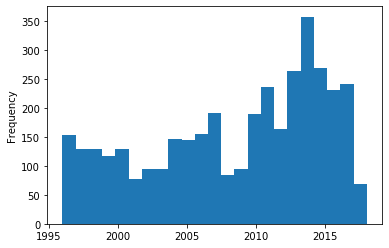

In [76]:
import matplotlib
import matplotlib.pyplot as plt

df.Year.plot(kind='hist',alpha=1, bins = 23)

plt.show()

First we can see that in the years around the financial crisis in 2001 and 2008 we have less IPOs information. If we will go to https://www.statista.com/statistics/270290/number-of-ipos-in-the-us-since-1999/ we will be able to see that our database does not contain all the IPOs in a given year but it give good reflection about those crisis years where the number of companies who went public droped significally. In additoin there is Disassociation in few years like 2002,2008,2009, where our database contain more IPOs than shown there. 

### The first questin I want to ask is if there any conection between the date of the IPO to the performance of the stock?


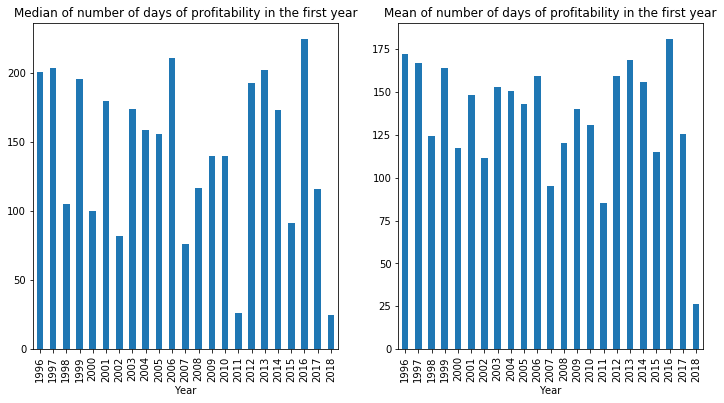

In [77]:
fig = plt.figure(figsize=(12,4))

df_YearGrouped = df.groupby(by='Year')
profitMedian = df_YearGrouped.daysProfit.median()
profitMean = df_YearGrouped.daysProfit.mean()
plt.subplot(1, 2, 1)
profitMedian.plot(kind='bar')
plt.title('Median of number of days of profitability in the first year')
plt.subplot(1, 2, 2)
profitMean.plot(kind='bar')
plt.title('Mean of number of days of profitability in the first year')


plt.show()


From the figures above we can tell that 2011 was a weak year for IPO but we can not tell about spesific trend. We see that 2018 is lower than all the others but there was no crisis in this year. I assume that since this database was collected in this year, the data was not accurate for 2018 since it does not comtain the whole year, therefor we should ignore 2018.

In [120]:
df = df[~df['Year'].isin(['2018'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3761
Columns: 1664 entries, Symbol to HomeRun
dtypes: float64(1596), int64(9), object(59)
memory usage: 46.9+ MB


We see that our the rows decreased by 68.

We can also see from the figures above that 2011 was a week year for new public compnies but it is not bold.

Now, let see the profitabiility of the first year acorrding to the month the IPO accures:

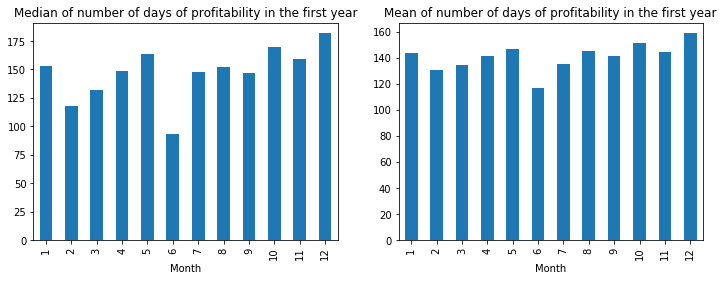

In [90]:
fig = plt.figure(figsize=(12,4))

df_MonthGrouped = df.groupby(by='Month')
profitMedian = df_MonthGrouped.daysProfit.median()
profitMean = df_MonthGrouped.daysProfit.mean()

plt.subplot(1, 2, 1)
profitMedian.plot(kind='bar')
plt.title('Median of number of days of profitability in the first year')
plt.subplot(1, 2, 2)
profitMean.plot(kind='bar')
plt.title('Mean of number of days of profitability in the first year')
plt.show()

We can tell that June was the weakest month for IPO, but lets compare it with the S&P:

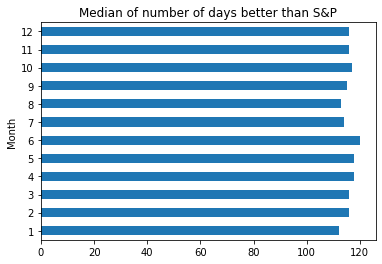

In [74]:

betterSNPMedian = df_MonthGrouped.DaysBetterThanSP.median()

betterSNPMedian.plot(kind='barh')
plt.title('Median of number of days better than S&P')

plt.show()


OK, probably it was just a coincidence since IPO in all monthes are pretty equal comparing with the S&P. 

Let see by the month of each year:

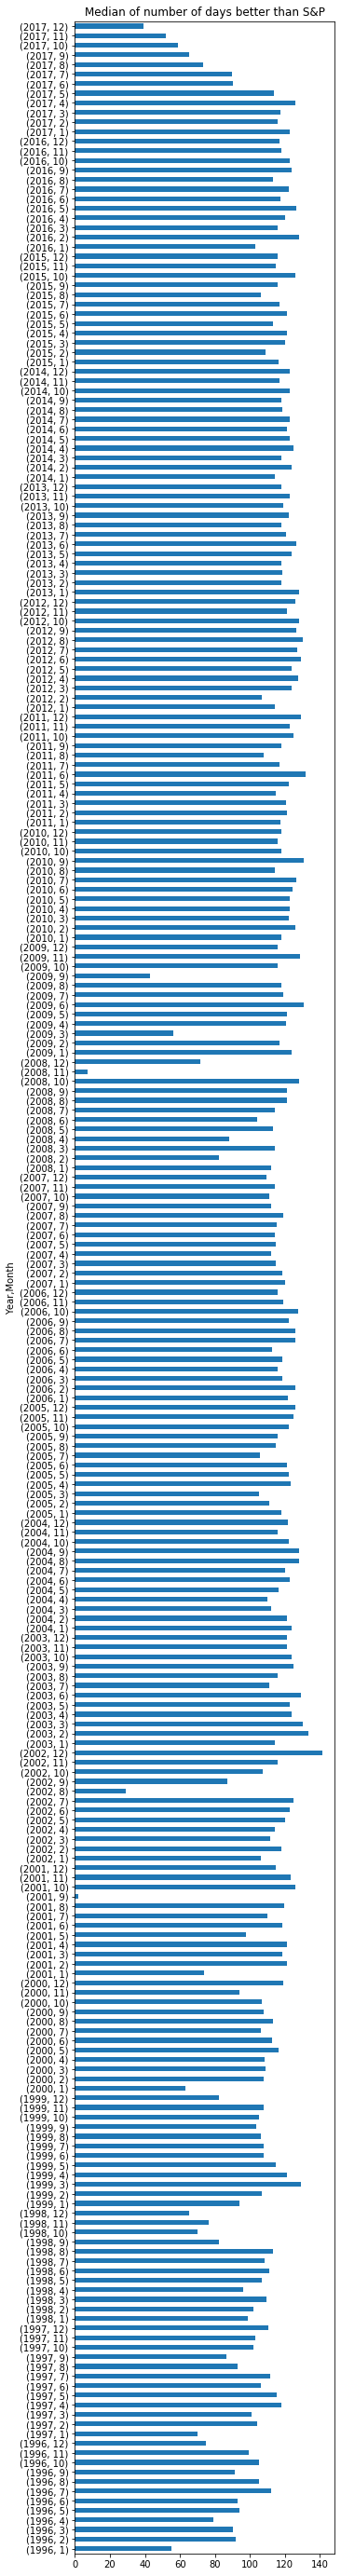

In [84]:
fig = plt.figure(figsize=(5,50))

df_YMGrouped = df.groupby(by=['Year','Month'])
betterSNPMedian = df_YMGrouped.DaysBetterThanSP.median()

betterSNPMedian.plot(kind='barh')
plt.title('Median of number of days better than S&P')

plt.show()

We can see that it is pretty equally distributed, but we can tell from signicifacnt drop in specific monthes like: Sep 2001, Aug 2002, Nov 2008 which were the peak of the crisis, that those were the worst monthes but around those low peaks the performance of the new stocks look like they are doing as good as stock that their IPO where in better years. we can conclude from that the "bad years" like I said at the beginning, acually were just really bad monthes that drag the all year down.

for the conclusion of investigate profitability to the IPO date, I will do the following:

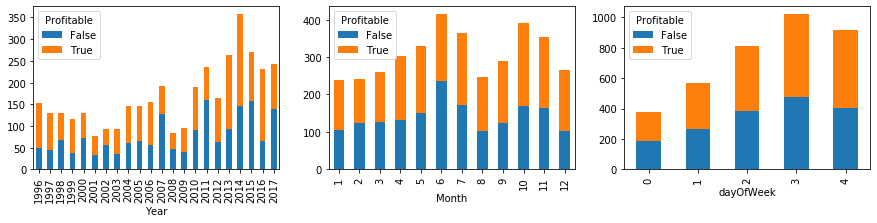

In [89]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df['Year']], # categories to cross tabulate
            df.Profitable.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

pd.crosstab([df['Month']], # categories to cross tabulate
            df.Profitable.astype(bool)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df['dayOfWeek']], # categories to cross tabulate
            df.Profitable.astype(bool)).plot(kind='bar', stacked=True, ax=ax3)

plt.show()

So, we can not conclude anything from this figures.
Bottom line and the answer for the first question is that there in on relation between the day of the week, month or the year of the IPO to the performance of the stock. The only thing we can say it that IPO in a crisis month most of the time perform worse than ususal.

### The second quesion I want to ask is if there any correlation between the section or the industry of the company, the time it was IPO and its profitability?

First let see how many missing data do we have in the section and industry columns 

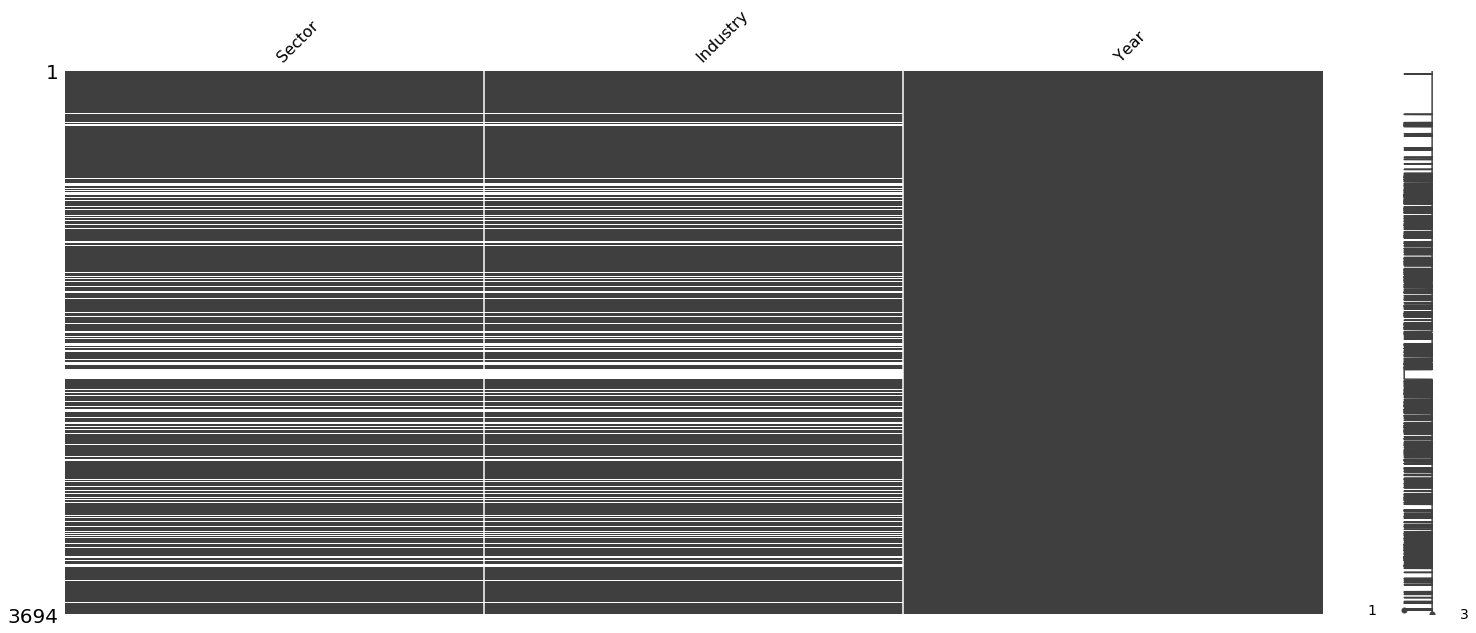

In [143]:
import missingno as mn

#sorting it by date
df = df.sort_values(by=['Year','Month','Day'])

%matplotlib inline
mn.matrix(df[['Sector','Industry' ,'Year']])

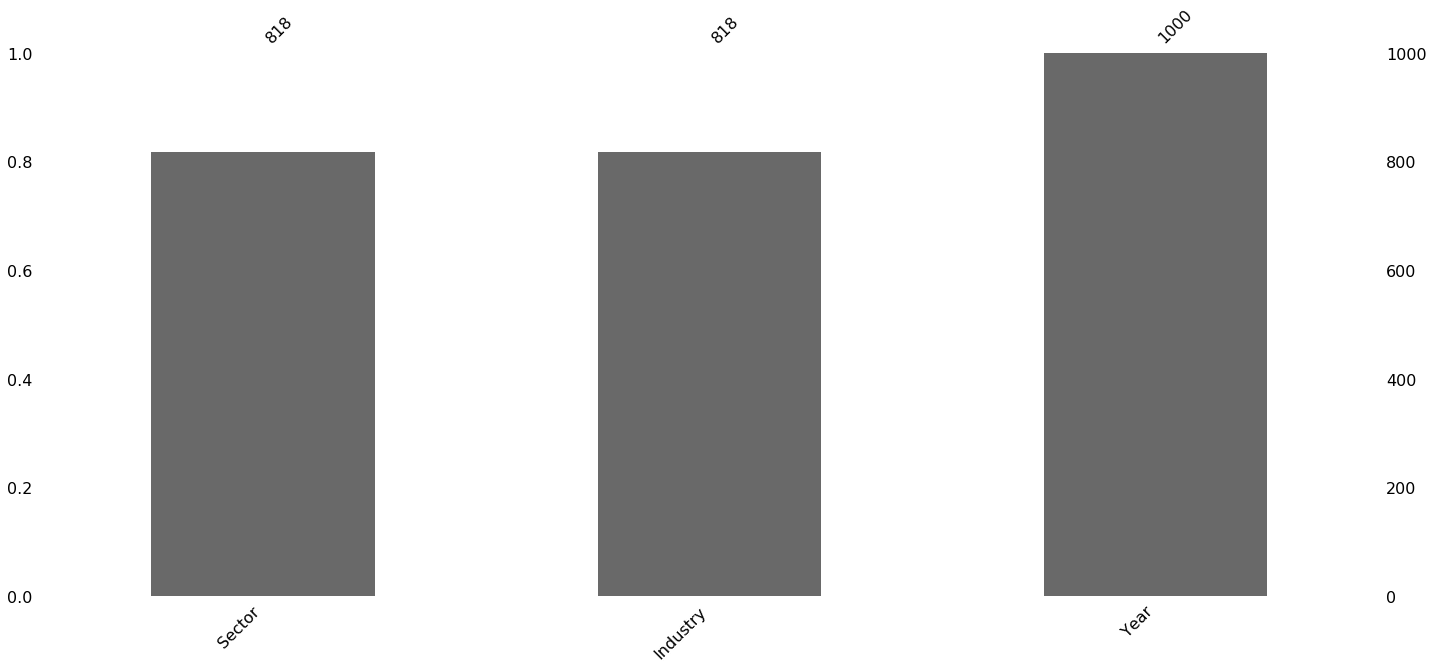

In [145]:
mn.bar(df[['Sector','Industry' ,'Year']].sample(1000))

we can see that there is no relation between date and missing data. Also, in the year column we have no missing data, but in the sector and the idustry columns we have the same amount of missing data at the sape rows. Therefore, we should eliminate those rows because we cannot predict section.

In [156]:
df['Sector'].replace('', np.nan, inplace=True)
df.dropna(subset=['Sector'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 2577 to 1702
Columns: 1664 entries, Symbol to HomeRun
dtypes: float64(1596), int64(9), object(59)
memory usage: 37.9+ MB


We received smaller database with elemets that contains their sector. Now let's see the deviation by sector:

Text(0.5, 1.0, 'Number of company by sector')

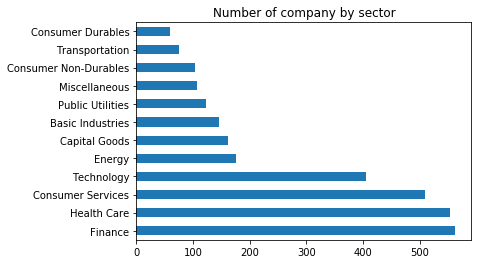

In [160]:

#df.Sector.plot(kind='bar',alpha=1, bins = 'auto')


pd.Series(df.Sector).value_counts().plot(kind = 'barh')
plt.title('Number of company by sector')


NOw I want to plot each section by it self to see if there is a realtion between the sector and success.
Also I want to graph each sector and to see by year if there was more profitability than other years.